In [ ]:
import numpy as np
import pandas as pd
import os
import heapq
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
DATA_DIR = '.\data\enhanced'
hairdryer = 'hair_dryer_finished.csv'
microwave = 'microwave_finished.csv'
pacifier = 'pacifier_finished.csv'

In [3]:
hdata = pd.read_csv(os.path.join(DATA_DIR, hairdryer))
mdata = pd.read_csv(os.path.join(DATA_DIR, microwave))
pdata = pd.read_csv(os.path.join(DATA_DIR, pacifier))

In [4]:
# 以hair dryer为例
hnum = hdata.shape[0]
review_fav = np.sum(hdata.like==1)
htech = np.sum(hdata.tech==1)
print('Sample Number:', hnum)
print('Favorable Rate:', review_fav/hnum)
print('Related to Products Rate:', htech/hnum)

Sample Number: 11470
Favorable Rate: 0.7816913687881429
Related to Products Rate: 0.8493461203138623


Text(0, 0.5, 'number')

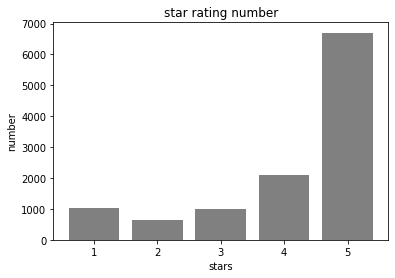

In [45]:
star_num = []
for i in range(1,6):
    star_num.append(np.sum(hdata.star_rating==i))
plt.figure()
plt.bar(range(1, 6), star_num, fc='grey')
plt.title('star rating number')
plt.xlabel('stars')
plt.ylabel('number')

Text(0, 0.5, 'number')

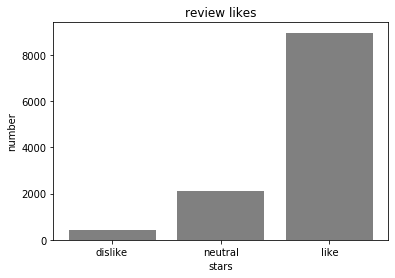

In [46]:
like_num = []
for i in range(-1,2):
    like_num.append(np.sum(hdata.like==i))
plt.figure()
plt.bar(['dislike', 'neutral', 'like'], like_num, fc='grey')
plt.title('review likes')
plt.xlabel('stars')
plt.ylabel('number')

In [287]:
l = [   ['work'], 
        ['heat'], 
        ['door', 'open'], 
        ['money', 'cheap', 'high', 'low', 'expensive'],
        ['small', 'big', 'space', 'size']
    ]
d = [   ['work'], 
        ['heat'], 
        ['burn', 'break', 'broken', 'noise', 'die'], 
        ['money', 'cheap', 'high', 'low', 'expensive'],
        ['small', 'big', 'space', 'size']
    ]
ll = list(np.zeros(5))
dd = list(np.zeros(5))
for line in mdata[(mdata.tech==1)&(mdata.like==1)].review_body:
    for i in range(5):
        types = l[i]
        for word in types:
            if word in line:
                ll[i]+=1
for line in mdata[(mdata.tech==1)&(mdata.like==-1)].review_body:
    for i in range(5):
        types = d[i]
        for word in types:
            if word in line:
                dd[i]+=1
                

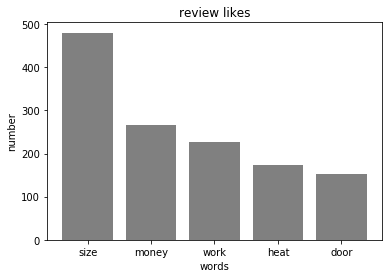

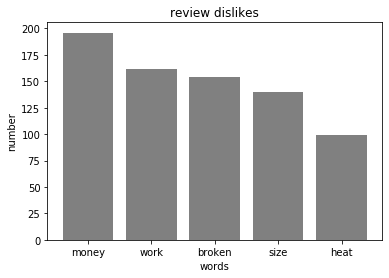

In [288]:
plt.figure()
plt.bar(['size', 'money', 'work', 'heat', 'door'], np.sort(ll)[::-1], fc='grey')
plt.title('review likes')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('microwave_likes.jpg')

plt.figure()
plt.bar(['money', 'work', 'broken', 'size', 'heat'], np.sort(dd)[::-1], fc='grey')
plt.title('review dislikes')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('microwave_dislikes.jpg')

In [289]:
l = [   ['cord', 'long', 'short'],
        ['time', 'fast'],
        ['size', 'small', 'big', 'space'],
        ['power', 'vol'],
        ['money', 'cheap', 'high', 'low', 'expensive', 'price'],
    ]
d = [   ['cord',  'long', 'short'],
        ['burn', 'break', 'broken', 'die'], 
        ['money', 'cheap', 'high', 'low', 'expensive', 'price'],
        ['small', 'big', 'space', 'size'],
        ['heat', 'hot', 'cold'],
    ]
ll = list(np.zeros(len(l)))
dd = list(np.zeros(len(d)))
for line in hdata[(hdata.tech==1)&(hdata.like==1)].review_body:
    for i in range(len(l)):
        types = l[i]
        for word in types:
            if word in line:
                ll[i]+=1
for line in hdata[(hdata.tech==1)&(hdata.like==-1)].review_body:
    for i in range(len(d)):
        types = d[i]
        for word in types:
            if word in line:
                dd[i]+=1
                

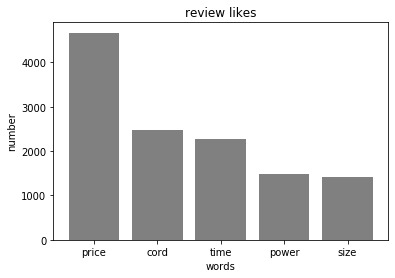

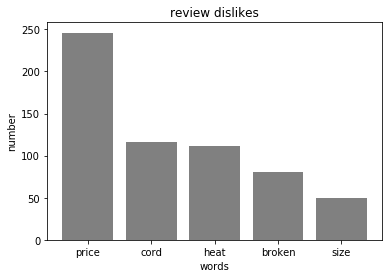

In [290]:
plt.figure()
plt.bar(['price', 'cord', 'time', 'power', 'size'], np.sort(ll)[::-1], fc='grey')
plt.title('review likes')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('hairdryer_likes.jpg')

plt.figure()
plt.bar(['price', 'cord', 'heat', 'broken', 'size'], np.sort(dd)[::-1], fc='grey')
plt.title('review dislikes')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('hairdryer_dislikes.jpg')

In [295]:
l = [   ['cheap', 'high', 'low', 'expensive'],
        ['long', 'time'],
        ['small', 'big', 'size', 'cover', 'shape']
    ]
d = [   ['time', 'long', 'short'],
        ['burn', 'break', 'broken', 'die'], 
        ['money', 'cheap', 'high', 'low', 'expensive', 'price'],
        ['small', 'big', 'size', 'cover', 'shape']
    ]
ll = list(np.zeros(len(l)))
dd = list(np.zeros(len(d)))
for line in hdata[(hdata.tech==1)&(hdata.like==1)].review_body:
    for i in range(len(l)):
        types = l[i]
        for word in types:
            if word in line:
                ll[i]+=1
for line in hdata[(hdata.tech==1)&(hdata.like==-1)].review_body:
    for i in range(len(d)):
        types = d[i]
        for word in types:
            if word in line:
                dd[i]+=1
                

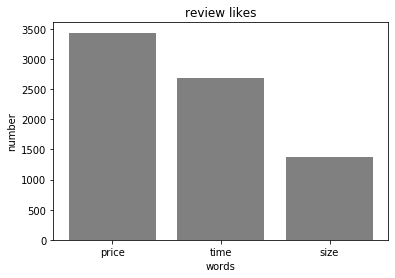

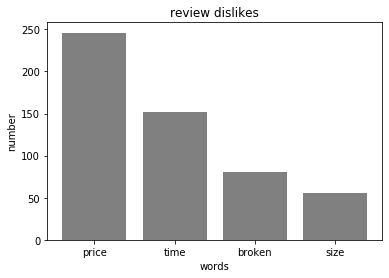

In [298]:
plt.figure()
plt.bar(['price', 'time', 'size'], np.sort(ll)[::-1], fc='grey')
plt.title('review likes')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('pacifier_likes.jpg')

plt.figure()
plt.bar(['price', 'time', 'broken', 'size'], np.sort(dd)[::-1], fc='grey')
plt.title('review dislikes')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('pacifier_dislikes.jpg')

In [17]:
def desc(dataset, name):
    print(name)
    n = dataset.shape[0]
    li = np.sum(dataset.like==1)
    di = np.sum(dataset.like==-1)
    ne = np.sum(dataset.like==0)
    uf = np.sum(dataset.tech==1)
    ul = np.sum(dataset.tech==0)
    u_l = np.sum((dataset.tech==1)&(dataset.like==-1))
    u_n = np.sum((dataset.tech==1)&(dataset.like==0))
    print('dislike,neutral,like,ttotal')
    print('useful,'+str(u_l/n)+','+str(u_n/n)+','+str((uf-u_l-u_n)/n)+','+str(uf/n))
    print('useless,'+str((di-u_l)/n)+','+str((ne-u_n)/n)+','+str((li-(uf-u_l-u_n))/n)+','+str(ul/n))
    print('total,'+str(di/n)+','+str(ne/n)+','+str(li/n)+','+str(1))

In [18]:
desc(hdata, 'hair dryer')
desc(mdata, 'microwave')
desc(pdata, 'pacifier')

hair dryer
dislike,neutral,like,ttotal
useful,0.033391455972101136,0.17079337401918046,0.6451612903225806,0.8493461203138623
useless,0.002092414995640802,0.012031386224934612,0.13653007846556234,0.15056669572798606
total,0.035483870967741936,0.1828247602441151,0.7816913687881429,1
microwave
dislike,neutral,like,ttotal
useful,0.31455108359133127,0.0718266253869969,0.4848297213622291,0.8712074303405573
useless,0.005572755417956657,0.005572755417956657,0.11764705882352941,0.1281733746130031
total,0.3201238390092879,0.07739938080495357,0.6024767801857586,1
pacifier
dislike,neutral,like,ttotal
useful,0.08374696377653396,0.017636498046256204,0.1544513676206569,0.25583482944344704
useless,0.08443341429929242,0.011986482205090295,0.6477452740521702,0.744165170556553
total,0.1681803780758264,0.0296229802513465,0.8021966416728271,1


In [5]:
hdata = hdata.dropna(axis=0,how='any')
pdata = pdata.dropna(axis=0,how='any')
mdata = mdata.dropna(axis=0,how='any')
pdata = pdata.drop(pdata.tail(1).index, axis=0)

In [6]:
def buildmatrix(dataset):
    mtx1 = np.zeros((3,5))
    for i in range(3):
        for j in range(5):
            mtx1[i,j] = int(np.sum((dataset.like==i-1)&(dataset.star_rating.astype(int)==j+1)))
    mtx2 = mtx1/dataset.shape[0]
    return mtx1, mtx2

In [7]:
a,b = buildmatrix(pdata)
print('pacifier')
print(pd.DataFrame(a))
print(pd.DataFrame(b))

pacifier
       0      1      2       3        4
0  466.0  335.0  428.0   624.0   1330.0
1   73.0   49.0   99.0   143.0    197.0
2  644.0  557.0  895.0  1939.0  11082.0
          0         1         2         3         4
0  0.024707  0.017762  0.022692  0.033084  0.070516
1  0.003870  0.002598  0.005249  0.007582  0.010445
2  0.034145  0.029532  0.047452  0.102805  0.587562


In [8]:
a,b = buildmatrix(hdata)
print('hair_dryer')
print(pd.DataFrame(a))
print(pd.DataFrame(b))

hair_dryer
       0      1      2       3       4
0  212.0   56.0   45.0    35.0    59.0
1  356.0  250.0  410.0   477.0   602.0
2  462.0  333.0  544.0  1583.0  6037.0
          0         1         2         3         4
0  0.018498  0.004886  0.003926  0.003054  0.005148
1  0.031062  0.021813  0.035773  0.041619  0.052526
2  0.040311  0.029055  0.047465  0.138121  0.526743


In [9]:
a,b = buildmatrix(mdata)
print('microwave')
print(pd.DataFrame(a))
print(pd.DataFrame(b))

microwave
       0     1     2      3      4
0  286.0  63.0  42.0   41.0   85.0
1   24.0   8.0  33.0   39.0   21.0
2   92.0  41.0  59.0  220.0  561.0
          0         1         2         3         4
0  0.177090  0.039009  0.026006  0.025387  0.052632
1  0.014861  0.004954  0.020433  0.024149  0.013003
2  0.056966  0.025387  0.036533  0.136223  0.347368


In [54]:
cv = CountVectorizer(max_df=0.35)
texts = pd.concat([pdata, hdata, mdata], axis=0)
subtext = texts[texts.like==-1].review_body
cv_fit = cv.fit_transform(texts.review_body)
names = cv.get_feature_names()
#print(cv.get_feature_names())

In [67]:
positive = ['awesome', 'better', 'best', 'excellent', 'expected', 'love', 'nice', 'perfectly']
negative = ['disappointed', 'problem', 'annoying', 'broken']
tp = []
tn = []

for i in positive:
    tp.append(np.sum(texts.review_body.str.contains(i)))
for i in negative:
    tn.append(np.sum(texts.review_body.str.contains(i)))

In [71]:
pos = ['love', 'nice', 'better']
neg = ['disappointed', 'problem', 'annoying']

In [72]:
posd = []
negd = []
for i in pos:
    idx = texts.review_body.str.contains(i)
    posd.append(texts[idx])
for i in neg:
    idx = texts.review_body.str.contains(i)
    negd.append(texts[idx])

In [77]:
for i in range(3):
    posd[i].to_csv('positive_'+pos[i]+'.csv')
    negd[i].to_csv('negative_'+neg[i]+'.csv')

In [95]:
pm = np.zeros((3,5))
nm = np.zeros((3,5))
for i in range(3):
    for j in range(1,6):
        pm[i,j-1]=np.sum( posd[i].star_rating.astype(int)==j )
        
for i in range(3):
    for j in range(1,6):
        nm[i,j-1]=np.sum( negd[i].star_rating.astype(int)==j )

In [102]:
print(pd.DataFrame(pm))

       0      1      2      3       4
0  167.0  126.0  268.0  905.0  6249.0
1   72.0   88.0  189.0  501.0  1297.0
2  153.0  167.0  221.0  303.0   825.0


In [103]:
print(pd.DataFrame(nm))

       0      1      2      3      4
0  180.0  111.0   81.0   44.0  104.0
1  186.0  104.0  153.0  284.0  602.0
2   25.0   33.0   46.0   45.0   53.0
